<a href="https://colab.research.google.com/github/viraj-code1/NLP-Projects/blob/main/P5_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis

API key : N38EPkd4X0n5nw48q8oaYXi3w

API Secret Key : wmPyG1agINKEy0ZDo44PLQGmefCmXDbmZB9a5Lu8ZLtXJ7N0GW

Bearer Token : AAAAAAAAAAAAAAAAAAAAAFUNSQEAAAAAVrvwWFVmLzWVxLQIbtonq97THsA%3DofCjw8qL6y72pv1YJAHnBWAt4wRpHgxhu7HpIKxXkfBRJMi8uc

Access Token : 1389844882529869824-q4SMcxnCAE9jMzaT2rbSDAWR8ITOzY

Access Token Secret : nQCXhQCCHDv2yvQxRRxUY2kB8qlmpDJx9ZNslgKCz2aCD

In [ ]:
from textblob import TextBlob

In [ ]:
import tweepy

In [ ]:
import matplotlib.pyplot as plt


## Connecting with Twitter API

In [ ]:
consumer_key ="N38EPkd4X0n5nw48q8oaYXi3w"
consumer_secret="wmPyG1agINKEy0ZDo44PLQGmefCmXDbmZB9a5Lu8ZLtXJ7N0GW"
access_token ="1389844882529869824-q4SMcxnCAE9jMzaT2rbSDAWR8ITOzY"
access_token_secret= "nQCXhQCCHDv2yvQxRRxUY2kB8qlmpDJx9ZNslgKCz2aCD"

In [ ]:
auth =tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api= tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
search_term = "Money Heist"
no_of_tweets= 1000

In [ ]:
tweets =tweepy.Cursor(api.search, q=search_term).items(no_of_tweets)


## Understanding the working of TextBlob

In [ ]:
a="I am a good person"
b="i am a bad person"
c= "i am a person"

In [ ]:
TextBlob(a).sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [ ]:
TextBlob(b).sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [ ]:
TextBlob(c).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

## Iterate the data

In [ ]:
positive =0
negative =0
neutral = 0
polarity =0

In [ ]:
for tweet in tweets :
  analysis =TextBlob(tweet.text)
  polarity += analysis.sentiment.polarity
  if (analysis.sentiment.polarity==0):
    neutral+=1
  elif (analysis.sentiment.polarity<0.00):
    negative+=1
  elif (analysis.sentiment.polarity>0.00):
    positive+=1
    

In [ ]:
print(positive, negative, neutral)

312 161 1180


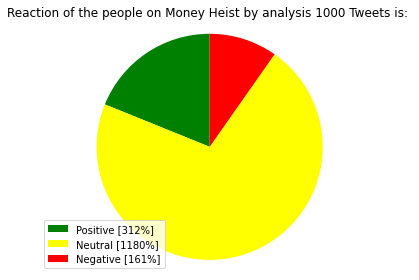

In [ ]:
labels = ['Positive ['+ str(positive)+'%]',
          'Neutral ['+ str(neutral)+'%]',
          'Negative ['+ str(negative)+'%]' ]
      
sizes =[positive, neutral, negative]
colors= ['green','yellow','red'] 
patches , texts = plt.pie(sizes, colors =colors, startangle=90)
plt.legend(patches, labels,loc="best")
plt.title('Reaction of the people on ' + search_term +
          ' by analysis '+str(no_of_tweets)+' Tweets is: ')
plt.axis('equal')
plt.tight_layout()
plt.show()